# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


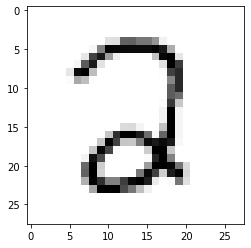

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.24973379247658029
train accuracy is: 0.5320480721081623, test accuracy is 0.5539314516129032


Epoch 10 Loss 0.2164494332030924
train accuracy is: 0.8733934234685361, test accuracy is 0.8830645161290323


Epoch 20 Loss 0.12393534887860008
train accuracy is: 0.9117843431814389, test accuracy is 0.922883064516129


Epoch 30 Loss 0.06913659050125456
train accuracy is: 0.9328993490235353, test accuracy is 0.9430443548387096


Epoch 40 Loss 0.051037215376323115
train accuracy is: 0.9448339175429812, test accuracy is 0.9516129032258065


Epoch 50 Loss 0.0425630102473129
train accuracy is: 0.9520113503588716, test accuracy is 0.9576612903225806


Epoch 60 Loss 0.03775147016831475
train accuracy is: 0.9559339008512769, test accuracy is 0.9606854838709677


Epoch 70 Loss 0.03460534189887542
train accuracy is: 0.9600233683859122, test accuracy is 0.9642137096774194


Epoch 80 Loss 0.03233825555892676
train accuracy is: 0.9623602069771323, test accuracy is 0.9657258064516129


Epoch 90 Loss 0.030589430790337
train accuracy is: 0.9637790018360874, test accuracy is 0.9662298387096774


Epoch 100 Loss 0.029177236899496577
train accuracy is: 0.9656985478217326, test accuracy is 0.96875


Epoch 110 Loss 0.027998162272875955
train accuracy is: 0.9666165915539977, test accuracy is 0.969758064516129


Epoch 120 Loss 0.026995724605530822
train accuracy is: 0.9682023034551828, test accuracy is 0.9707661290322581


Epoch 130 Loss 0.026117945637534497
train accuracy is: 0.9694541812719079, test accuracy is 0.9717741935483871


Epoch 140 Loss 0.025344712355045082
train accuracy is: 0.9704556835252879, test accuracy is 0.9727822580645161


Epoch 150 Loss 0.024648020050455802
train accuracy is: 0.971791019863128, test accuracy is 0.9727822580645161


Epoch 160 Loss 0.024021442312293837
train accuracy is: 0.972375229510933, test accuracy is 0.9727822580645161


Epoch 170 Loss 0.02344155723343333
train accuracy is: 0.9729594391587381, test accuracy is 0.9727822580645161


Epoch 180 Loss 0.02290809982512028
train accuracy is: 0.9735436488065431, test accuracy is 0.9722782258064516


Epoch 190 Loss 0.022410942645589335
train accuracy is: 0.9742113169754631, test accuracy is 0.9727822580645161


Epoch 200 Loss 0.02194733509349524
train accuracy is: 0.9749624436654982, test accuracy is 0.9727822580645161


Epoch 210 Loss 0.02150350589515051
train accuracy is: 0.9756301118344183, test accuracy is 0.9722782258064516


Epoch 220 Loss 0.021080508704770025
train accuracy is: 0.9761308629611083, test accuracy is 0.9727822580645161


Epoch 230 Loss 0.020691192493345917
train accuracy is: 0.9766316140877984, test accuracy is 0.9732862903225806


Epoch 240 Loss 0.02030580281263419
train accuracy is: 0.9771323652144884, test accuracy is 0.9732862903225806


0.031074468260750634

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.2547886376056918
train accuracy is: 0.6308629611083292, test accuracy is 0.6386088709677419


Epoch 10 Loss 0.10553861880816814
train accuracy is: 0.900267067267568, test accuracy is 0.9092741935483871


Epoch 20 Loss 0.08051734152478311
train accuracy is: 0.9217993657152396, test accuracy is 0.9349798387096774


Epoch 30 Loss 0.06909886881512091
train accuracy is: 0.9313136371223502, test accuracy is 0.9420362903225806


Epoch 40 Loss 0.062253849032427935
train accuracy is: 0.9382406943748957, test accuracy is 0.9490927419354839


Epoch 50 Loss 0.057602424590077715
train accuracy is: 0.942580537472876, test accuracy is 0.9536290322580645


Epoch 60 Loss 0.0541971007575667
train accuracy is: 0.9466700050075113, test accuracy is 0.9551411290322581


Epoch 70 Loss 0.05157292690656869
train accuracy is: 0.9489233850776164, test accuracy is 0.9586693548387096


Epoch 80 Loss 0.04947387865470926
train accuracy is: 0.9503421799365716, test accuracy is 0.9601814516129032


Epoch 90 Loss 0.04774849317864028
train accuracy is: 0.9511767651477215, test accuracy is 0.9616935483870968


Epoch 100 Loss 0.04629668380866055
train accuracy is: 0.9523451844433317, test accuracy is 0.9611895161290323


Epoch 110 Loss 0.04505375864452439
train accuracy is: 0.9530963111333667, test accuracy is 0.9637096774193549


Epoch 120 Loss 0.04397453325325939
train accuracy is: 0.9541812719078618, test accuracy is 0.9647177419354839


Epoch 130 Loss 0.04302400473116485
train accuracy is: 0.9550993156401268, test accuracy is 0.9642137096774194


Epoch 140 Loss 0.042179172399345086
train accuracy is: 0.9558504423301619, test accuracy is 0.9642137096774194


Epoch 150 Loss 0.04142248379051853
train accuracy is: 0.956601569020197, test accuracy is 0.9642137096774194


Epoch 160 Loss 0.04073838472312905
train accuracy is: 0.957269237189117, test accuracy is 0.9652217741935484


Epoch 170 Loss 0.04011601454276871
train accuracy is: 0.957686529794692, test accuracy is 0.9657258064516129


Epoch 180 Loss 0.03954596771676804
train accuracy is: 0.9581872809213821, test accuracy is 0.9657258064516129


Epoch 190 Loss 0.03902185901409292
train accuracy is: 0.9587714905691871, test accuracy is 0.9657258064516129


Epoch 200 Loss 0.038537036928914206
train accuracy is: 0.9591053246536472, test accuracy is 0.9657258064516129


Epoch 210 Loss 0.038087879945524095
train accuracy is: 0.9593557002169921, test accuracy is 0.9657258064516129


Epoch 220 Loss 0.037669391387024145
train accuracy is: 0.9596895343014522, test accuracy is 0.9662298387096774


Epoch 230 Loss 0.03727760215284995
train accuracy is: 0.9599399098647972, test accuracy is 0.9662298387096774


Epoch 240 Loss 0.03691097739019326
train accuracy is: 0.9601068269070272, test accuracy is 0.9667338709677419


0.015497554929081165

### Comparing results of NN and LR

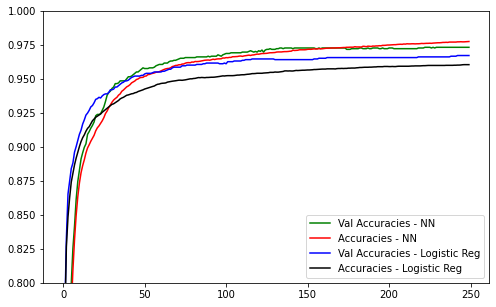

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

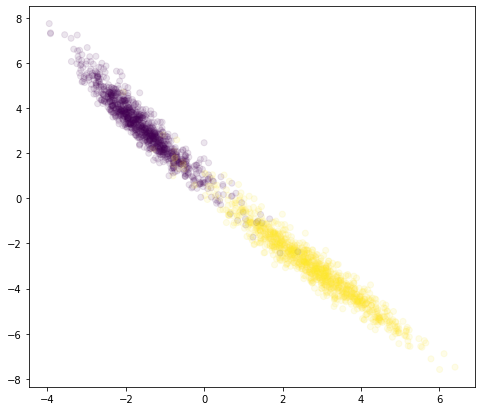

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

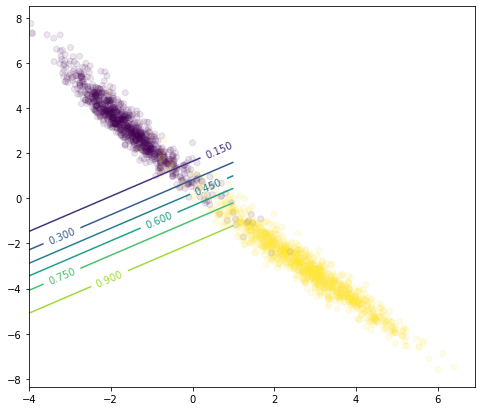

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );